👋 **Привет, Алина!**

Меня зовут Арсен Абдулин, и я буду твоим ревьювером по проекту. Предлагаю общаться на «ты», если не против =) Моя цель — не поиск ошибок в твоей работе, а поделиться опытом и помочь успешно завершить проект, чтобы на шаг приблизиться к профессии специалиста по Data Science.

Видно, что ты очень старалась, выполняя проект! Выполнены почти все ключевые этапы — есть только небольшая ошибка в теоретическом доказательстве, написал в комментарии что нужно сделать. В остальном я отметил рекомендации.

При проверке работ я делаю следующие комментарии:

<div class="alert alert-success">
<b>✔️ Зеленым цветом</b> отмечены удачные решения, на которые можно опираться в следующих проектах.</div>

<div class="alert alert-warning">
<b>⚠️ Желтым цветом</b> я отметил пункты, которые в следующий раз можно сделать по-другому. Одно-два таких замечания в проекте допускается, но если их много — проект следует доработать. </div>

<div class="alert alert-danger">
<b>🚫 Красным цветом</b> отмечены критические замечания, которые необходимо поправить, чтобы принять проект. </div>

Если какие-то моменты в задании для тебя были непонятны и у тебя есть ко мне вопросы — смело спрашивай 😊 Также ты можешь доработать места, где есть желтые комментарии в этом проекте (однако, это не обязательно).

Предлагаю работать над проектом в диалоге: если ты решишь что-то поменять по моим рекомендациям — пиши об этом (выбери для своих комментариев определенный цвет — так мне будет легче увидеть изменения). Пожалуйста не перемещай, не изменяй и не удаляй мои комментарии. Все это поможет сделать проверку твоего проекта оперативнее.

<div class="alert alert-info"> <b>ℹ️ Комментарий студента: </b> Пример комментария. </div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошо, что добавила небольшое описание и содержание проекта.
    
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')    
random_state=12345

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Лишние библиотеки лучше убрать из импорта, т.к. принято оставлять только те, которые будут использоваться в проекте =)
    
</div>

## Загрузка данных

In [2]:
try:
    data = pd.read_csv("/datasets/insurance.csv")
except:
    data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
#Переименуем столбцы
data.columns = ['sex', 'age', 'salary', 'family_members', 'insurance_payments']

In [6]:
data[['sex', 'age', 'salary', 'family_members']].describe()

,sex,age,salary,family_members
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200
std,0.500049,8.440807,9900.083569,1.091387
min,0.000000,18.000000,5300.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000
75%,1.000000,37.000000,46600.000000,2.000000
max,1.000000,65.000000,79000.000000,6.000000


<div class="alert alert-block alert-info">
Исходя из этой таблицы, видно, что по признакам нет выбивающихся значений и аномалий

In [7]:
#Исследуем признаки на пропуски
data.isna().sum()

sex                   0
age                   0
salary                0
family_members        0
insurance_payments    0
dtype: int64

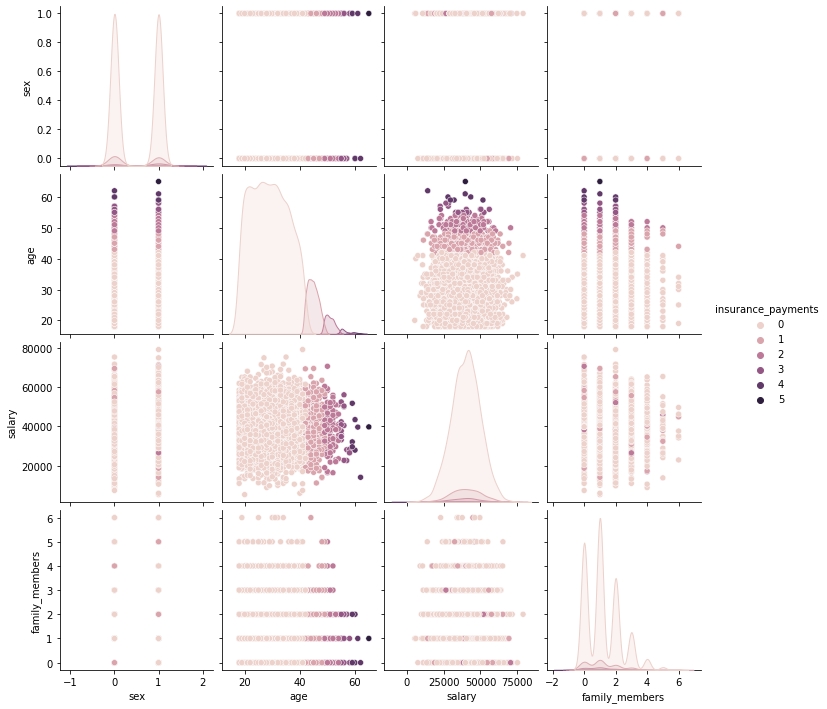

In [8]:
sns.pairplot(data, hue='insurance_payments')

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Данные успешно загружены! Здорово, что добавила таблицу статистики признаков.
    
Как рекомендация, можно посмотреть матрицу корреляции признаков.
    
</div>

<div class="alert alert-block alert-info">
Корреляция между признаками не выявлена

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Здорово, что добавила диаграммы pairplot.
    
Кстати, если посмотреть зависимость целевой переменной от признаков, можно увидеть высокую корреляцию страховых выплат от возраста.
    
</div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

<div class="alert alert-block alert-info">
    
**Обратимая матрица** - это матрица, для которой можно найти обратную.


**Единичная матрица** является обратимой, поскольку для нее существует обратная матрица, которая также равна единичной.

Матрица **обратима**, только тогда, когда она невырождена, то есть её определитель не равен нулю.

Для **неквадратных** матриц и **вырожденных матриц** обратных матриц не существует. 


**Ответ:** b.
Качество линейной регрессии не поменяется



**Обоснование:** 
1. Если умножить матрицу признаков (размера m x n) на обратимую матрицу, которая является единичной (размера n x n), матрица признаков останется без изменений, веса останутся те же, соответсвенно качество линейной регрессии не изменится. Поскольку:
$$XE = EX = X$$


2. Если умножить матрицу признаков (размера m x n) на обратимую матрицу, которая не является единичной (размера n x n), качество линейной регрессии также не изменится. Поскольку предсказания:
$$a = (X^T X)^{-1} X^T y X$$

Домножим X на обратимую (в то же время квадратную и вырожденную) матрицу P:
$$a = ((XP)^T XP)^{-1} (XP)^T y XP$$
По свойствам операции транспонирования и свойствам обратной матрицы:
$$a = (X^TP^T XP)^{-1} X^TP^T y XP$$
$$a = (X^TX)^{-1} X^TyP^TP(P^TP)^{-1}X$$
Выражение $P^TP(P^TP)^{-1} = E$, при домножении на обратимую матрицу P получаем:
$$a = (X^TX)^{-1} X^TyEX$$
По формуле $XE = EX = X$, соответственно:
$$a = (X^TX)^{-1} X^TyEX = (X^TX)^{-1} X^TyX$$
Значит предсказания $a$ не изменятся, как и качество линейной регрессии.



<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера:</b> У тебя правильные шаги в доказательстве, но ошибки:
    
Правильно, что не раскрываешь скобки в выражении $(X^T X)^{-1}$, поскольку отдельно матриц $(X^T)^{-1}$ и $(X)^{-1}$ не существует, т.е. к ним нет обратных матриц.
    
Также нужно обращать внимание при раскрытии скобок в операциях обращения и транспонирования матриц. Тебе помогут формулы:
    
$(AB)^T = B^T A^T$,  $(AB)^{-1} = B^{-1} A^{-1}$, $P^{-1}P = E$, где $E$ это единичная матрица.
    
$w_1 = (X_1^T X_1)^{-1} X_1^T y$, рассмотрим выражение для весов признаков, его нужно преобразовать.
    
Приведу пример:
    
- $w_1 = ((XP)^T XO)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y$. Дальше нужно вытащить матрицы $P$ и $P^T$ из-за скобок.
    
Вот здесь например у тебя ошибка:
    
$a = (X^TX)^{-1} X^TyP^TP(P^TP)^{-1}X$
    
Правильно будет так:
    
$a = XP P^{-1}(X^TX)^{-1} (P^T)^{-1} P^T X^T y$
</div>

<div class="alert alert-block alert-info">
ℹ️ Комментарий студента:
    
    
Разве ход моего доказательства неверный? Домножив на матрицу P матрицу признаков X, я доказала при помощи формул свойств операции транспонирования и свойств обратной матрицы, что предсказание $a$ до домножения и после останется неизменным.
   $$a = (X^TX)^{-1} X^TyEX = (X^TX)^{-1} X^TyX$$
    
    
У вас в доказательстве после преобразований $a=y$. Как я понимаю, просто у нас разный ход доказательства. Это не так??

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Немного не так =) Вот смотри:
    
$w = (X^T X)^{-1} X^T y$ — это вектор весов, вычисляется по такой непростой формуле.
    
$a = Xw = X (X^T X)^{-1} X^T y$ — то есть выражение $a = y$ неправильное.
    
$y$ — это реальные ответы, $a$ — предсказания, и они отличаются от ответов в среднем на величину среднеквадратичной ошибки RMSE.
    
Поэтому нужно доказывать, что $a_1 = a$ или $X_1 w_1 = Xw$.
    
В твоем доказательстве неправильно выполняются перестановки матриц при раскрытии скобок, а порядок при умножении матриц очень важен.
    
$a = XP P^{-1}(X^TX)^{-1} (P^T)^{-1} P^T X^T y = XE (X^TX)^{-1} E X^T y$ — это преобразование правильное.
</div>

<div class="alert alert-block alert-info">
ℹ️ Комментарий студента:
    
    
Я поняла! Порядок действительно важен $Xw$ - правильно, а $wX$ - нет.
Я так понимаю, исправлять ничего не нужно? Переотправляю работу, спасибо за объяснение)

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v3):</b> В общем да=)
    
Я думаю теперь ты уже запомнишь матричные умножения =)
    
https://ml-handbook.ru/chapters/linear_models/intro Можешь посмотреть вот здесь теорию по линейной регрессии и по матрицам в том числе.
    
Как дополнение по матричным разложениями и теории машинного обучения можно посмотреть видеолекции К. Воронцова или Е. Соколова, они есть на Youtube.
    
Дополнительные материалы:
    
Вот неплохая статья по основам матричных операций и линейным моделям, правда на английском языке:

https://jonathan-hui.medium.com/machine-learning-linear-algebra-a5b1658f0151

https://python-scripts.com/numpy информация по numpy с примерами

http://publish.sutd.ru/e_books/lin_alg_2013/html/matrix_33.html основные операции с матрицами

http://www.machinelearning.ru/wiki/images/b/bb/Sem08_factorizations.pdf по матричным разложениям
</div>

## Алгоритм преобразования

**Алгоритм**

Домножить матрицу признаков X (размера m x n) на обратимую произвольную матрицу (размера n x n).


**Обоснование**

Таким образом признаки будут преобразованы и по ним невозможно будет идентифицировать персональную информацию клиентов. При этом, исходя из вышеописанного вывода формул, предсказания не поменяется и качество линейной регресии останется без изменений.

$$a = (X^T X)^{-1} X^T y X = ((XA)^T XP)^{-1} (XP)^T y XP$$

## Проверка алгоритма

**Обучим модель на исходных признаках и посчитаем коэффициент детерминации на валидационной выборке**

In [9]:
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']

In [10]:
#Разделим выборку на обучающую и валидационную
x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=random_state)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)
R2 = model.score(x_valid, y_valid)
print("Коэффициент детерминации:", round(R2, 7))

Коэффициент детерминации: 0.4352276


**Обучим модель на признаках, умноженных на произвольную обратимую матрицу, и посчитаем коэффициент детерминации**

In [12]:
features.shape

(5000, 4)

In [13]:
np.random.seed(12345)
def P_matrix(n):
    while True:
        P = np.random.uniform(0, 100, (n, n))
        if np.linalg.det(P) != 0:
            break
    return P

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошая конструкция для проверки обратимости матрицы!
    
Чтобы получше «зашифровать» признаки, рекомендую использовать числа float вместо int.
    
</div>

In [14]:
P = P_matrix(4)

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Предпочтительно использовать оператор @ — он строже, чем np.dot. 
    
Оператор @ работает с матрицами и означает именно матричное умножение, а dot — скалярное произведение. В данном случае его допустимо использовать.
</div>

In [15]:
new_features = pd.DataFrame(features.values @ P)

In [16]:
x_train1 = new_features.loc[x_train.index, :]
x_valid1 = new_features.loc[x_valid.index, :]

In [17]:
model.fit(x_train1, y_train)
R2 = model.score(x_valid1, y_valid)
print("Коэффициент детерминации:", round(R2, 7))

Коэффициент детерминации: 0.4352276


<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Для наглядности, советую увеличить количество знаков после запятой в метрике r2.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Качество предсказания действительно не изменяется, результат достигнут!
    
Еще могу порекомендовать вот такой материал:
    
https://habr.com/ru/post/479398/

https://habr.com/ru/company/vk/blog/478514/ Применение зашифрованных данных для машинного обучения

https://www.amazon.science/blog/machine-learning-models-that-act-on-encrypted-data#:~:text=Privacy%2Dpreserving%20machine%20learning%20 Privacy-preserving machine learning (PPML)
 
</div>

<div class="alert alert-block alert-info">
    
**Вывод:** теоретически и на практике было выявлено и доказано, что при умножении матрицы признаков на обратимую матрицу качество модели не меняется. Соответственно, в данной задаче умножение матрицы признаков на случайную обратимую матрицу позволит преобразовать признаки таким образом, что по ним невозможно будет восстановить персональную информацию клиентов. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Правильный вывод =)
    
</div>

<font color=blue>
<b> ✔️ 👍Заключение ревьювера:</b> Алина, у тебя хорошая работа, получен положительный результат! 
   
Могу отметить грамотно составленный код, хорошую практическую часть =)
    
В проекте необходимо поправить теоретическое доказательство, в остальном я отметил рекомендации!
    
Отправляю работу для ознакомления с ходом проверки, а также если есть вопросы — смело задавай их, я постараюсь тебе помочь 😊

Жду твоего ответа!
</font>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования